## EDA

In [18]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df_movies_final= pd.read_csv("Dataset/Data_Moviesfinal.csv") 

C:\Users\lucia\AppData\Local\Temp\ipykernel_7520\3401292621.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies_final= pd.read_csv("Dataset/Data_Moviesfinal.csv")


In [ ]:
df_movies_final.head()

## Medidas de tendencia central y dispersión de las columnas numéricas

In [4]:
df_movies_final.describe()

,budget,id,revenue,runtime,vote_average,vote_count,return,return.1,release_year
count,4.545500e+04,45452.000000,4.545500e+04,45206.000000,45452.000000,45452.000000,1.094200e+04,4.545500e+04,45452.000000
mean,4.230922e+06,107991.064926,1.121831e+07,94.179821,5.623962,109.987283,inf,6.588962e+02,1991.882579
std,1.742869e+07,112118.576134,6.433710e+07,38.331639,1.915585,491.347202,NaN,7.462836e+04,24.057750
min,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1874.000000
25%,0.000000e+00,26367.750000,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,1978.000000
50%,0.000000e+00,59872.000000,0.000000e+00,95.000000,6.000000,10.000000,1.273533e+00,0.000000e+00,2001.000000
75%,0.000000e+00,156330.500000,0.000000e+00,107.000000,6.800000,34.000000,7.268590e+00,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,2.787965e+09,1256.000000,10.000000,14075.000000,inf,1.239638e+07,2020.000000


In [5]:
df_movies_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45455 entries, 0 to 45454
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      45455 non-null  float64
 1   id                          45452 non-null  float64
 2   original_language           45444 non-null  object 
 3   overview                    44514 non-null  object 
 4   popularity                  45453 non-null  object 
 5   release_date                45452 non-null  object 
 6   revenue                     45455 non-null  float64
 7   runtime                     45206 non-null  float64
 8   status                      45372 non-null  object 
 9   title                       45452 non-null  object 
 10  vote_average                45452 non-null  float64
 11  vote_count                  45452 non-null  float64
 12  return                      10942 non-null  float64
 13  return.1                    454

In [7]:
##  Busqueda de nulos
print(df_movies_final.isnull().sum())  

budget                            0
id                                3
original_language                11
overview                        941
popularity                        2
release_date                      3
revenue                           0
runtime                         249
status                           83
title                             3
vote_average                      3
vote_count                        3
return                        34513
return.1                          0
belongs_to_collection_name    40958
genres                            0
production_companies              0
production_countries              0
spoken_languages                  0
release_year                      3
cast                              4
crew                              4
dtype: int64


## Histograma de la columna vote_average 

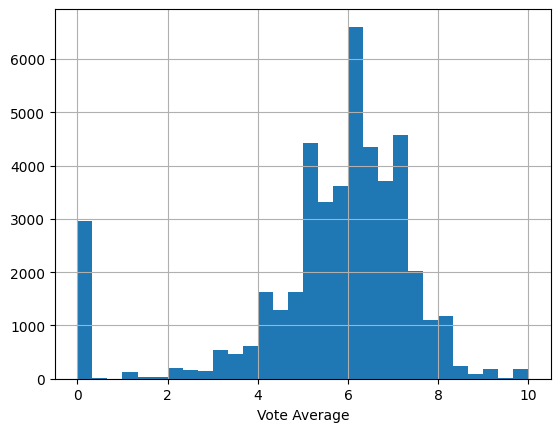

In [25]:
df_movies_final['vote_average'].hist(bins=30)
plt.xlabel('Vote Average')
plt.show()

## Grafico de correlacion con variables numericas 

C:\Users\lucia\AppData\Local\Temp\ipykernel_7520\1106908723.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


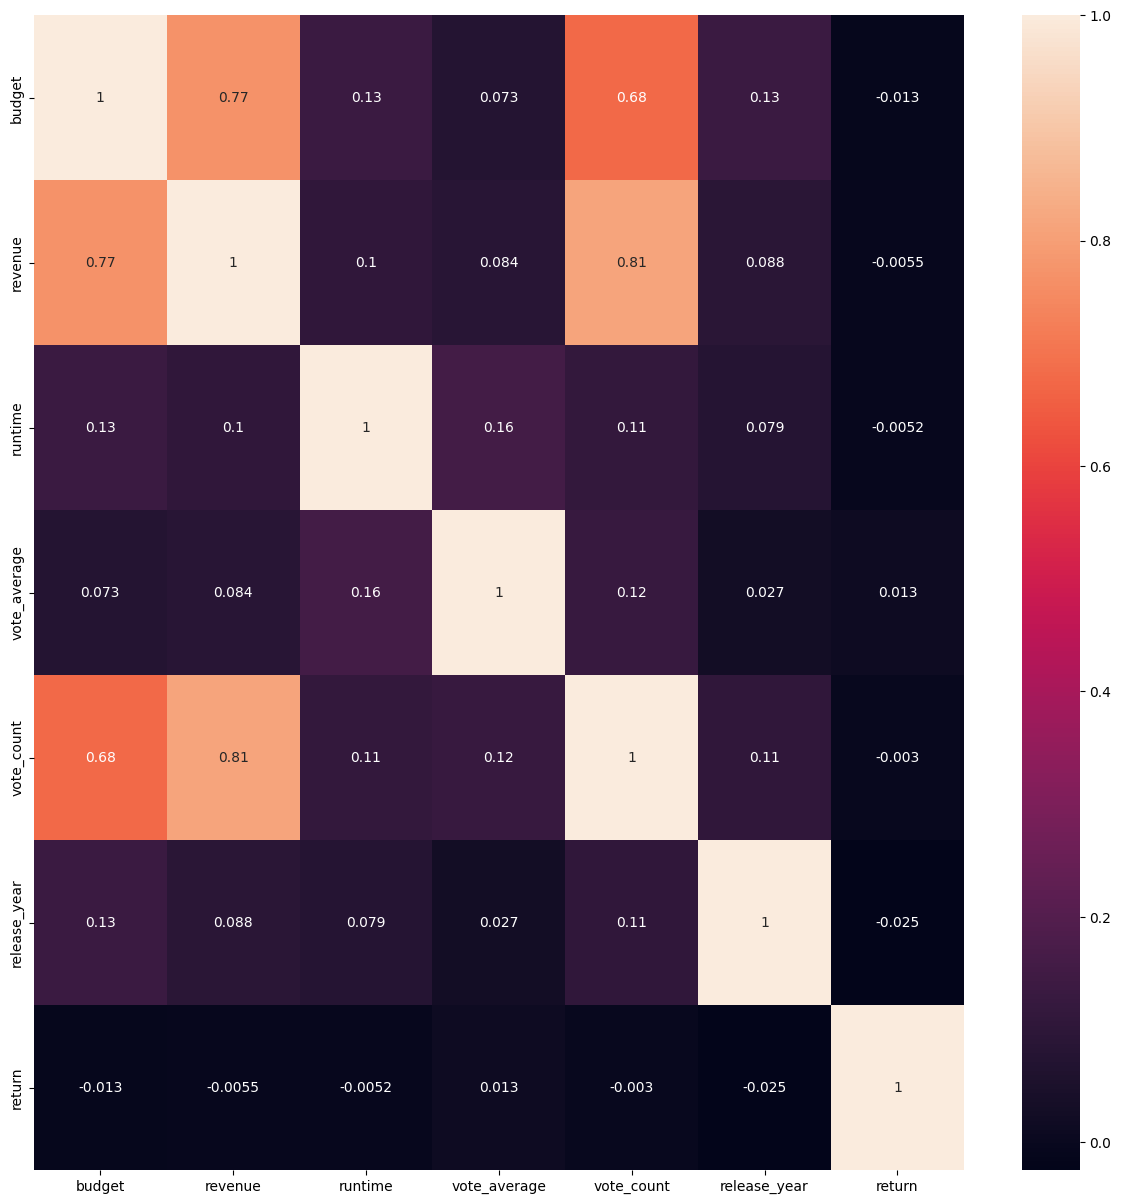

In [8]:
#Variables numericas importantes
df = df_movies_final[['budget','popularity','revenue', 'runtime',
                'vote_average', 'vote_count', 'release_year', 'return']]

#Calculo de matriz de correlacion
corr_matrix = df.corr() 
plt.figure(figsize=(15,15))

#Diseño de mapa de calor
sns.heatmap(corr_matrix, annot=True) 
plt.show()

## Nube de Palabras - Titulos

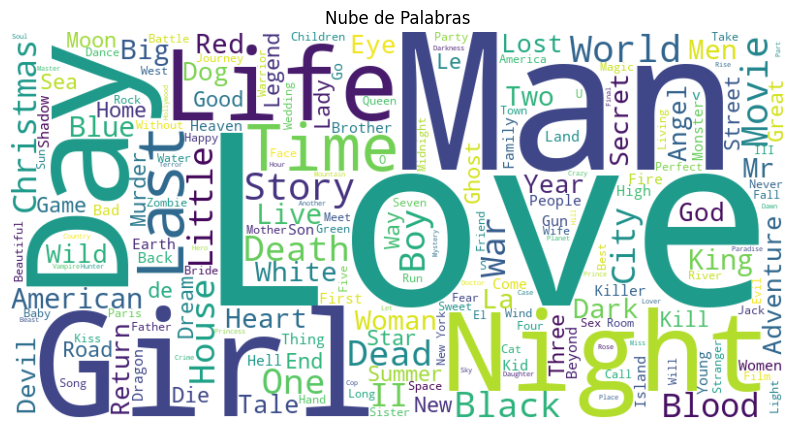

In [19]:
titulo = df_movies_final['title'].astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

## Nube de Palabras - Géneros 

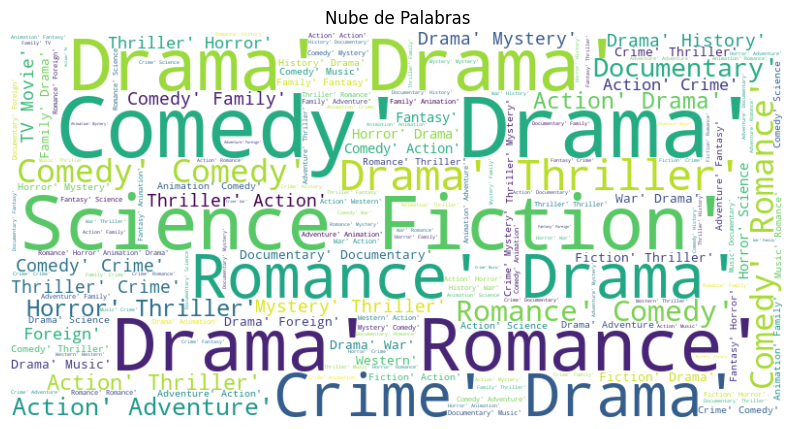

In [20]:
titulo = df_movies_final['genres'].astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

## Nube de Palabras - Actores 

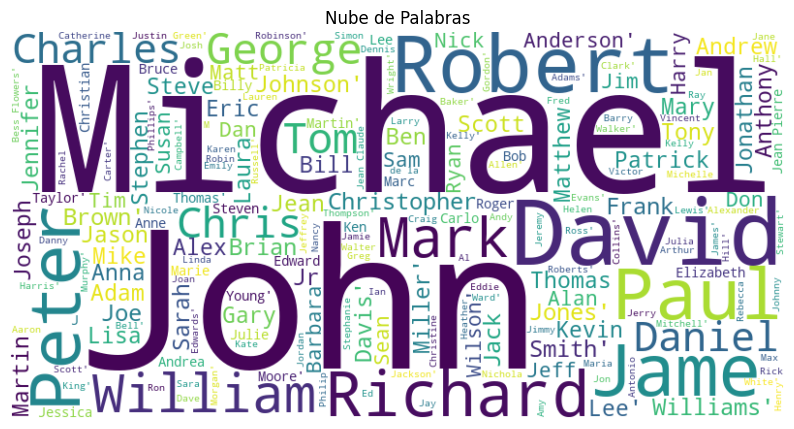

In [26]:
titulo = df_movies_final['cast'].astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

## Nube de Palabras - Directores 

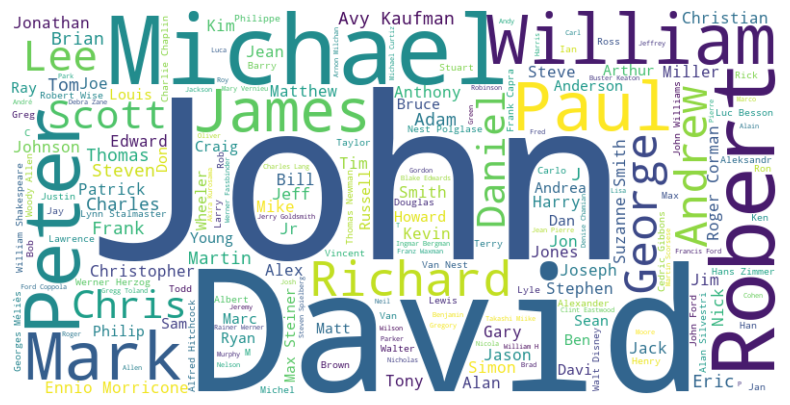

In [30]:
df_crew = df_movies_final[df_movies_final['crew'] != 'No Director']
actores_filtrados = df_crew['crew'].dropna()

titles = ' '.join(actores_filtrados)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()